# Programming Assignment 4 

###### Question 1: Predicting Sales using regression trees. You can use Scikit Learn for implementing trees.

In [456]:
#Importing necessary libraries
import numpy as np        # Python library for numerical computation
import scipy as sp        # Python library for mathematics
import pandas as pd       # Python library for data

# StatsModels
import statsmodels.api as sm            #python library for statstical computation and estimation
import statsmodels.formula.api as smf   #python library for formula and methods

# scikit-learn Libraries
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree

# Libraries for Visulization
from IPython.display import display
from IPython.display import Image
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns

In [457]:
#Reading the csv file data using pandas 
Dataset=pd.read_csv("Cardata.csv")
Dataset.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [458]:
#Below code gives integer values to the labels. 
Dataset.Sales = Dataset.Sales.map(lambda x: 0 if x<=8 else 1)
Dataset.ShelveLoc = pd.factorize(Dataset.ShelveLoc)[0]
Dataset.Urban = Dataset.Urban.map({'No':0, 'Yes':1})
Dataset.US = Dataset.US.map({'No':0, 'Yes':1})
Dataset.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0


#### A. Spliting the Dataset

In [459]:
#Here in x we take all other columns except sales and in y we take sales. 
X = Dataset.iloc[:,1:11]
y = Dataset['Sales']
y.head()

0    1
1    1
2    1
3    0
4    0
Name: Sales, dtype: int64

In [460]:
# Divided the data into training set and testing set.
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, train_size=0.2, random_state=18)
X.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


#### B.Fit a regression tree to the training set. Plot the tree and interpret the results. What test MSE do you obtain?

In [461]:
# Fitting Decision Tree Regressor where we took max depth4
Regression_tree = DecisionTreeRegressor(max_depth=4)  
Regression_tree.fit(X_Train, Y_Train)

DecisionTreeRegressor(max_depth=4)

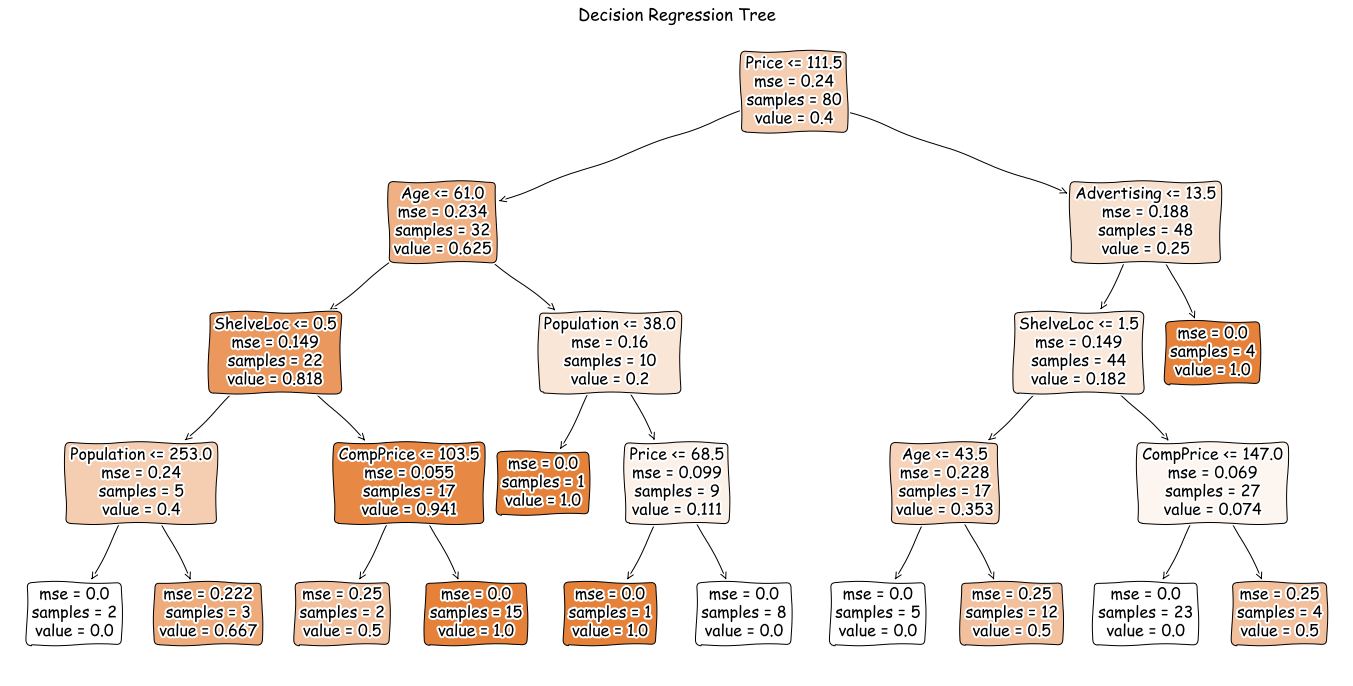

In [462]:
# Plot Decision Tree using Scikitlearn DecsisionTreeRegressor
Fig=plt.figure(figsize=(24,12))
tree.plot_tree(Regression_tree.fit(X_Train, Y_Train),feature_names=X.columns,filled=True,rounded=True,fontsize=16);
plt.title('Decision Regression Tree');

Mean Squared Error of regression tree:  0.27326388888888886


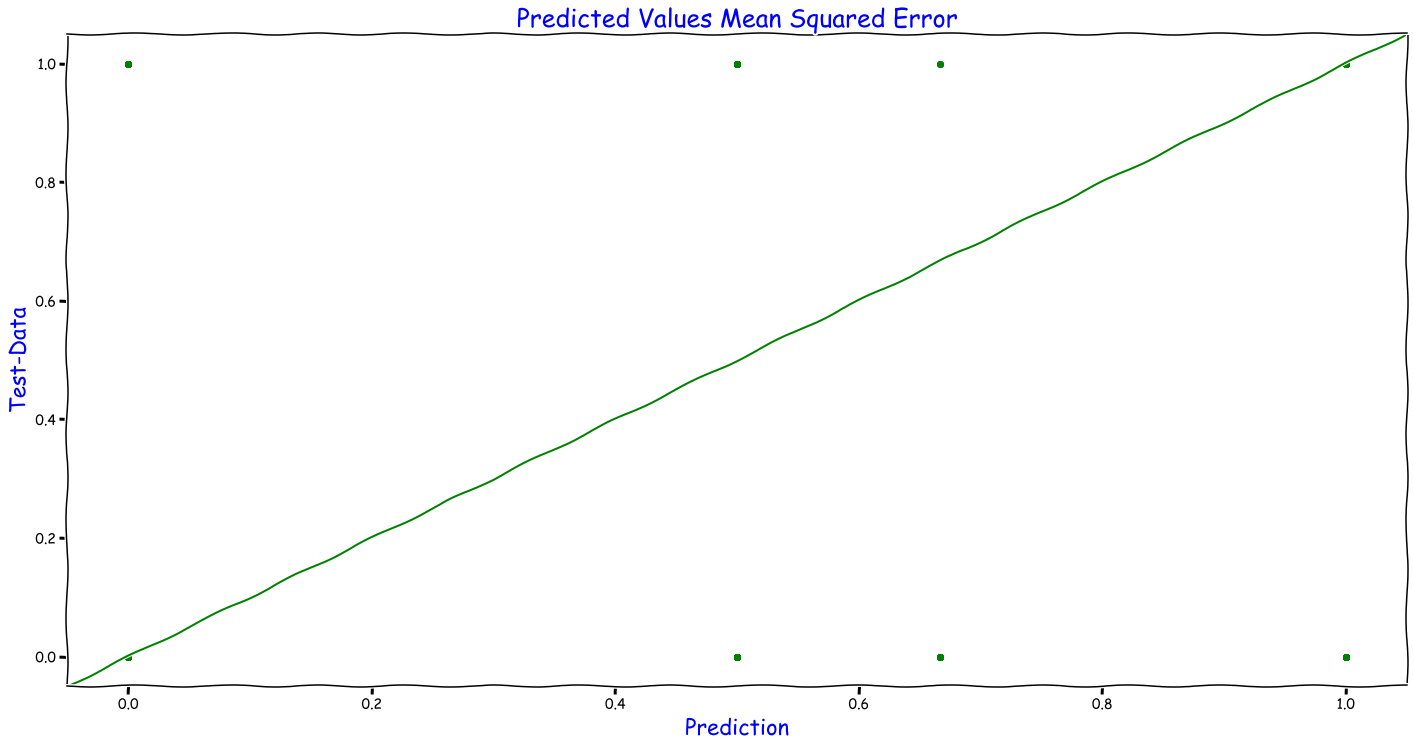

In [463]:
#Prediction on test data.
Prediction_R = Regression_tree.predict(X_Test)

plt.xkcd()
plt.figure(figsize=(24, 12))
plt.scatter(Prediction_R, Y_Test, label = 'medv', color='g')
plt.plot([0, 1], [0, 1], 'g', transform = plt.gca().transAxes)

plt.xlabel('Prediction', color='b', fontsize=22)
plt.ylabel('Test-Data', color='b', fontsize=22)
plt.title('Predicted Values Mean Squared Error', fontsize=25, color='b')

print("Mean Squared Error of regression tree: ", mean_squared_error(Y_Test, Prediction_R))

#### C. Use cross-validation in order to determine the optimal level of tree complexity. Does pruning the tree improve the test MSE?

In [464]:
SCORES = []
Max_Leaf_Array = range(2, 50)
for Max_Leafs in Max_Leaf_Array:
    regressiontree = DecisionTreeRegressor(max_leaf_nodes=Max_Leafs)
    sc = cross_val_score(regressiontree, X, y, cv=6, scoring="neg_mean_squared_error")
    SCORES.append((-sc.mean(), sc.std()))
SCORES = np.array(SCORES)

Number of best leafs are 11.


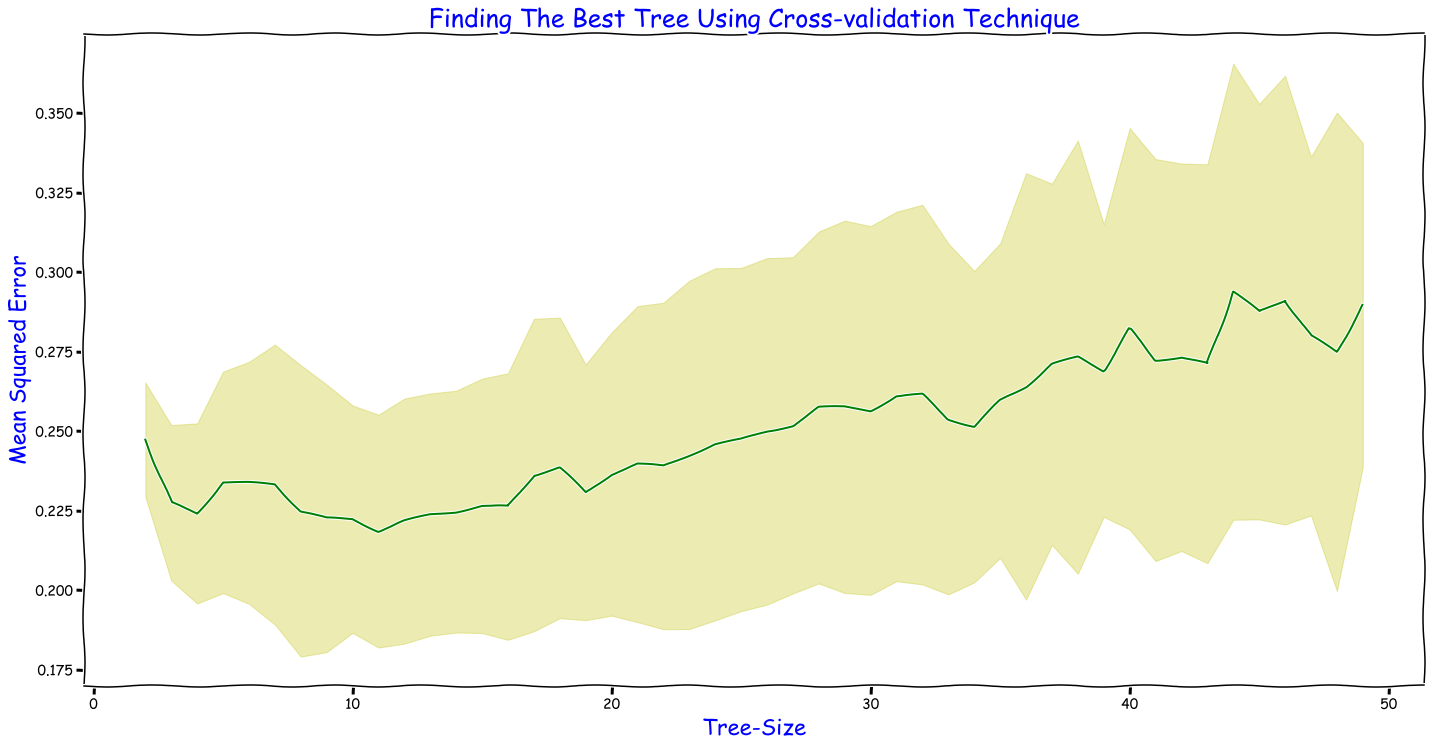

In [465]:
plt.xkcd()
plt.figure(figsize=(24, 12))
plt.plot(Max_Leaf_Array, SCORES[:,0], 'g')
plt.fill_between(Max_Leaf_Array, SCORES[:,0]+SCORES[:,1], SCORES[:,0]-SCORES[:,1], alpha=0.3, color='y')
plt.xlabel('Tree-Size', fontsize=22, color='b')
plt.ylabel('Mean Squared Error', fontsize=22, color='b')
plt.title('Finding The Best Tree Using Cross-validation Technique', fontsize=25, color='b')
Best_Minimum_Leafs = Max_Leaf_Array[np.argmin(SCORES[:,0])]
print(f"Number of best leafs are {Best_Minimum_Leafs}.")

#### Pruning is a data compression technique which reduces the size of decision trees by removing parts of the tree that are non-critical and redundant to classify instances. Pruning reduce the complexity of model and improves the accuracy and decreases the overfitting. Overall, Pruning increases the classification error but it decreases the Mean squared error because it reduces the overfitting. 

#### D.  Use the bagging approach in order to analyse this data. What test MSE do you obtain?

Mean Squared Error USing Bagging Approach:  0.17613906250000003


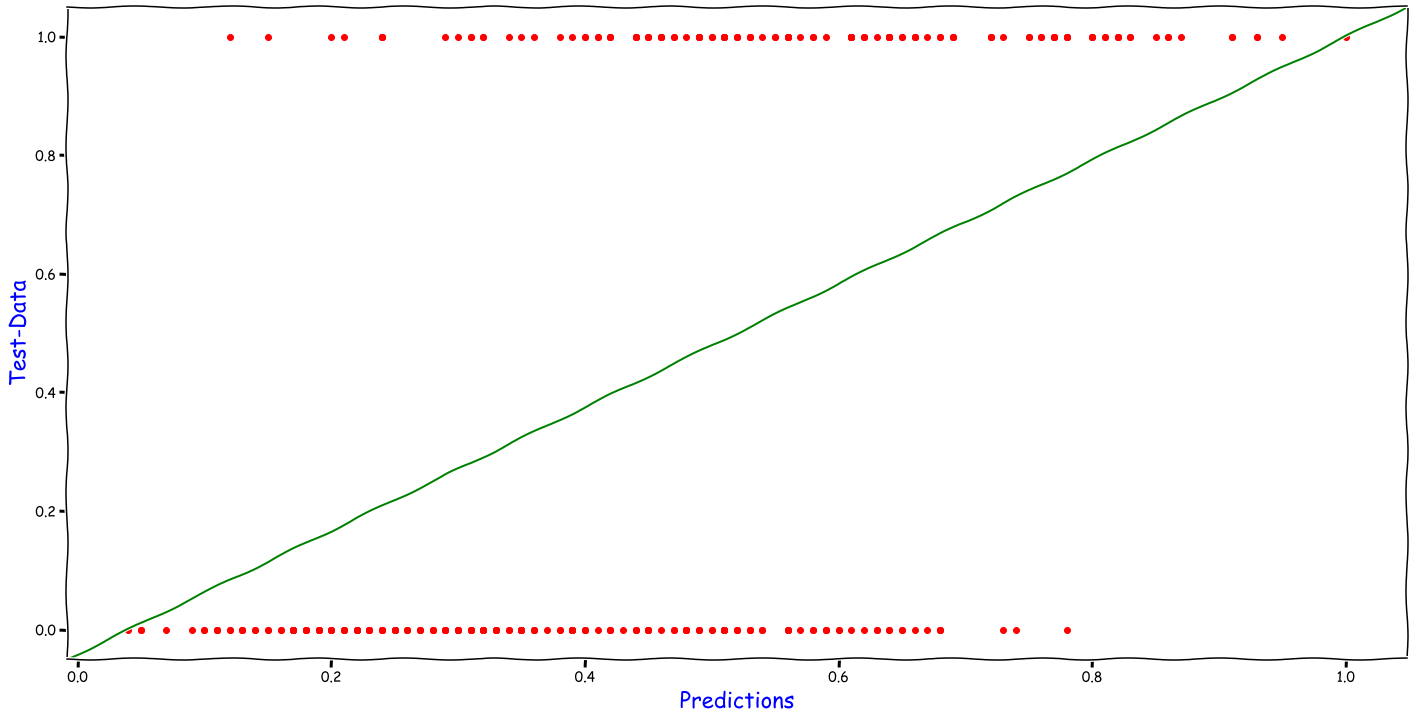

In [466]:
import warnings
warnings.filterwarnings('ignore')

Bagging= RandomForestRegressor(max_features=6).fit(X_Train, Y_Train)
Bagging_Prediction = Bagging.predict(X_Test)

plt.xkcd()
plt.figure(figsize=(24, 12))
plt.scatter(Bagging_Prediction, Y_Test, label = 'medv', color='r')
plt.plot([0, 1], [0, 1], 'g', transform = plt.gca().transAxes)
plt.xlabel('Predictions',fontsize=22, color='b')
plt.ylabel('Test-Data',fontsize=22, color='b')

print("Mean Squared Error USing Bagging Approach: ", mean_squared_error(Y_Test, Bagging_Prediction))

#### E. Use random forests to analyse this data. What test MSE do you obtain?

Mean Squared Error Using Random Forest Regressor:  0.17343281250000003


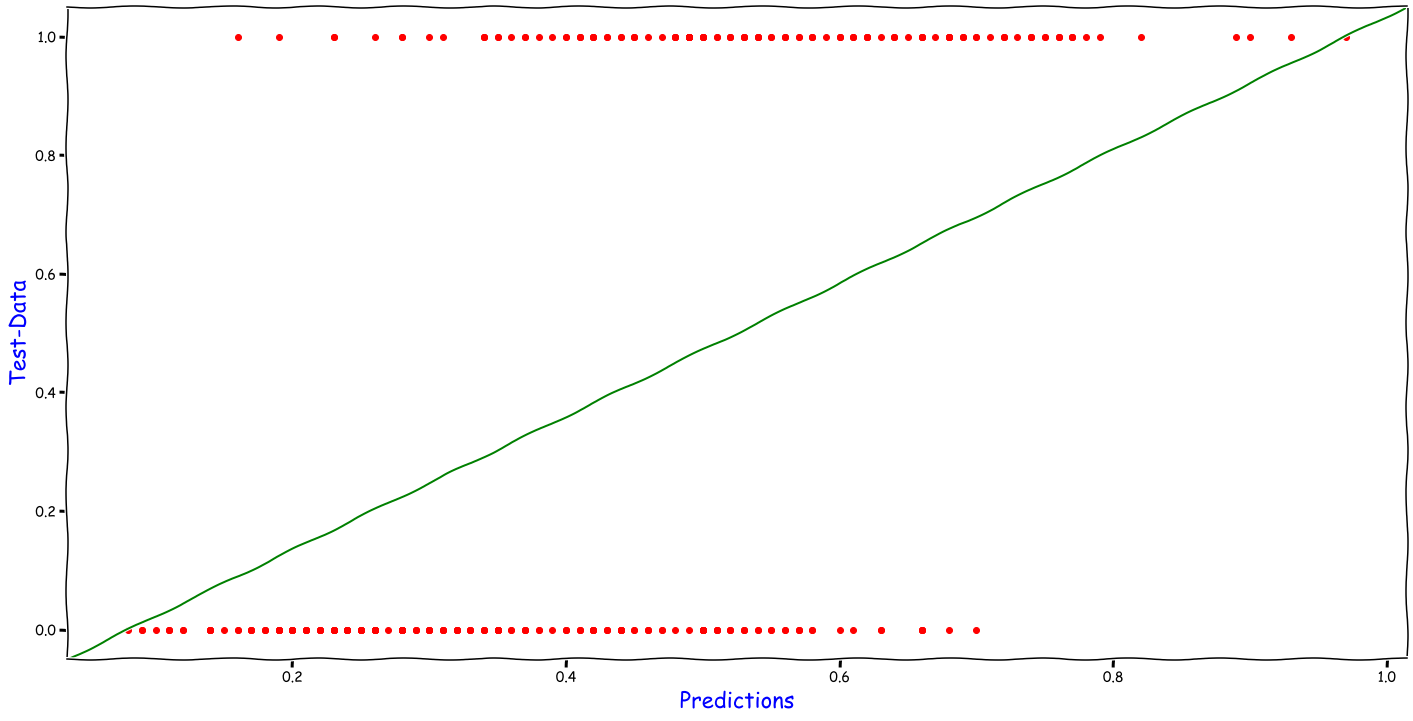

In [467]:
Random_Forest = RandomForestRegressor(max_features=3).fit(X_Train, Y_Train)

RF_prediction = Random_Forest.predict(X_Test)

plt.xkcd()
plt.figure(figsize=(24, 12))
plt.scatter(RF_prediction, Y_Test, label = 'medv', color='r')
plt.plot([0, 1], [0, 1], 'g', transform = plt.gca().transAxes)
plt.xlabel('Predictions',fontsize=22, color='b')
plt.ylabel('Test-Data',fontsize=22, color='b')

print("Mean Squared Error Using Random Forest Regressor: ", mean_squared_error(Y_Test, RF_prediction))

###### Question2. Perform K-Means clustering on Fish Market dataset (use download link from previous assignments) with K = 7 (No. of fish species). Normalize dataset before clustering. You can use Scikit Learn for clustering. How well do the clusters that you obtained in K-means clustering compare to the true class labels (Species)? Describe your results.

In [468]:
#Importing Necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import math

In [469]:
#Reading data from CSV file
Dataset1 = pd.read_csv('Fish.csv')
print(Dataset1)

    Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]


In [470]:
Dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [471]:
Dataset1.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [472]:
#Make array of species
Dataset1.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [473]:
#Dataset1.corr()

##### Normalization of data and Applying K-Means Clustering.

In [474]:
X=Dataset1.iloc[:,1:7]
X.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [475]:
#Below code normalize our dataset and for normalization we used Sckitlearn pre-processing libraries.
from sklearn import preprocessing
X_normalization = preprocessing.normalize(X)

In [476]:
from sklearn.cluster import KMeans
kmeans_clustering = KMeans(n_clusters=7, random_state=0).fit(X_normalization)

In [477]:
kmeans_clustering.labels_
#kmeans.score

array([0, 0, 0, 0, 5, 5, 5, 0, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 4, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 0, 4, 0, 0, 0, 0, 0, 0, 5, 5, 5, 2, 2, 4, 4, 4,
       4, 0, 4, 0, 0, 0, 1, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 6, 1, 6, 6], dtype=int32)

In [478]:
kmeans_clustering.cluster_centers_

array([[0.98422649, 0.09088637, 0.09824469, 0.10754415, 0.0291688 ,
        0.01478642],
       [0.41455842, 0.48455179, 0.51274857, 0.56146066, 0.09607448,
        0.0582441 ],
       [0.89453082, 0.22681553, 0.24809227, 0.27002538, 0.07411411,
        0.03894617],
       [0.        , 0.51630217, 0.55706286, 0.6195626 , 0.17595578,
        0.0910757 ],
       [0.96079027, 0.1425249 , 0.15539693, 0.1695393 , 0.04630177,
        0.0249035 ],
       [0.9957844 , 0.04605648, 0.04990506, 0.05561971, 0.018572  ,
        0.0082545 ],
       [0.58173996, 0.42981847, 0.46257423, 0.49842276, 0.09131453,
        0.05715133]])

In [479]:
len(kmeans_clustering.labels_)

159

In [480]:
kmeans_clustering.score(X_normalization)

-0.21236858401228062

In [481]:
from sklearn.metrics import silhouette_samples, silhouette_score
score = silhouette_score(X_normalization, kmeans_clustering.labels_, metric='euclidean')
print('Score:', score)

Score: 0.6104335904007592


In [482]:
#Assigned cluster label to species.
Dataset1['cluster'] = kmeans_clustering.labels_
Dataset1.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,cluster
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,0
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,0
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,0
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,0
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,5


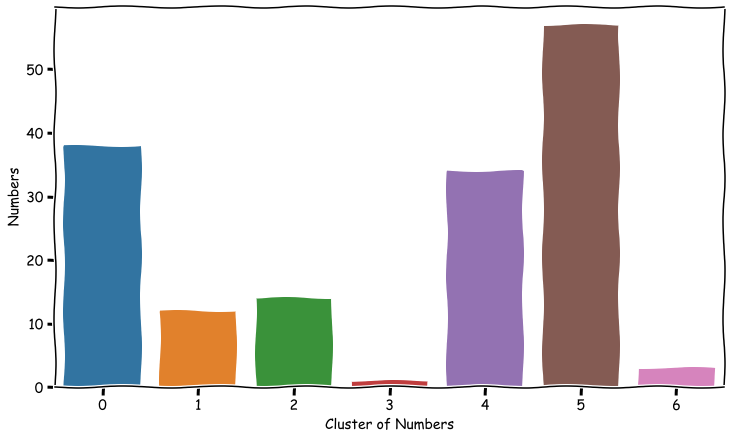

In [483]:
#Plot a graph for K-means Clustering. 
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,7,1),y=Dataset1.groupby(['cluster']).count()['Species'].values)
x=axis.set_xlabel("Cluster of Numbers")
x=axis.set_ylabel("Numbers")

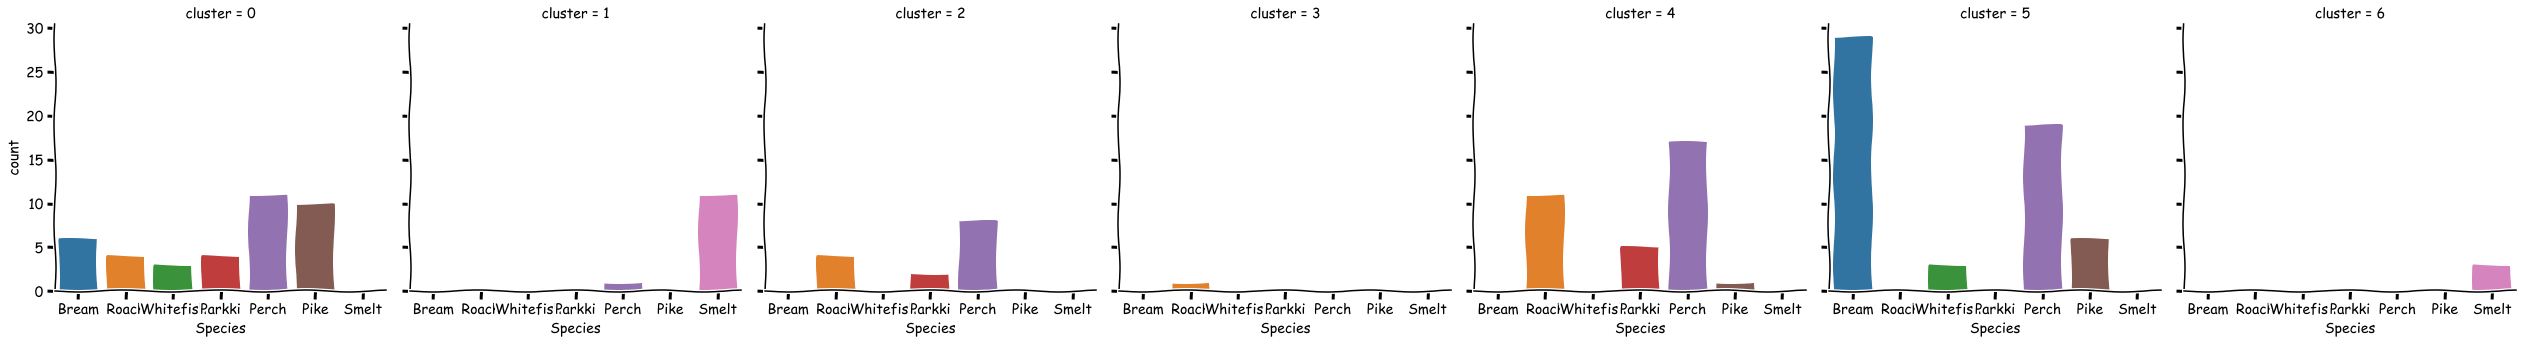

In [484]:
sns.factorplot(col='cluster', y=None, x='Species', data=Dataset1, kind='count' )

#### From the above graph we can say that cluster 3 and cluster 6 provides clear separation for the one individual species while other clusters have also some data points of another clusters. While the remaining cluster have the majority portion for the similarity species. Such as, in cluster 1 and cluster 5 have one species as majority. While in cluster 0,2 and 4 are not giving clear results for species. Overall, for this given data we are getting moderate clustering result in comparison of true label. 